In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.integrate import quad
from scipy import special
from classes import P_dist_handler, H_pot
plt.rc('animation', html='jshtml')

In [2]:
def gauss(xs, x0, spread):
    return np.exp(-((xs-x0)**2)/spread**2)

def v_pot(xs, T, k, x0):
    return -2.0*gauss(xs, 1.5, 0.5)-0.75*gauss(xs, 8.5, 5.5)

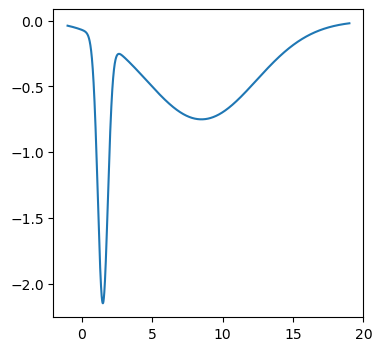

In [3]:
fig, ax = plt.subplots(figsize=(4,4))
xs = np.linspace(-1.0,19.0, 3000)
ax.plot(xs, v_pot(xs, 0, 0,0))

In [7]:
def proposal_func(x, x_min=0.0, x_max=19.0):
    return x_min + (x_max-x_min)*np.random.rand(1)

temps = [0.05, 0.15, 0.25, 0.35, 0.65]
pots = []
for temp in temps:
    pot = H_pot(T=temp, x_0=1.0, v_func=v_pot)
    pots.append(pot)

We did metro-montecarlo
-2.110164490117624
We did metro-montecarlo
-2.0338058734908357
We did metro-montecarlo
-1.1011304566513342
We did metro-montecarlo
-0.7004297866709457
We did metro-montecarlo
-0.5590304427027151


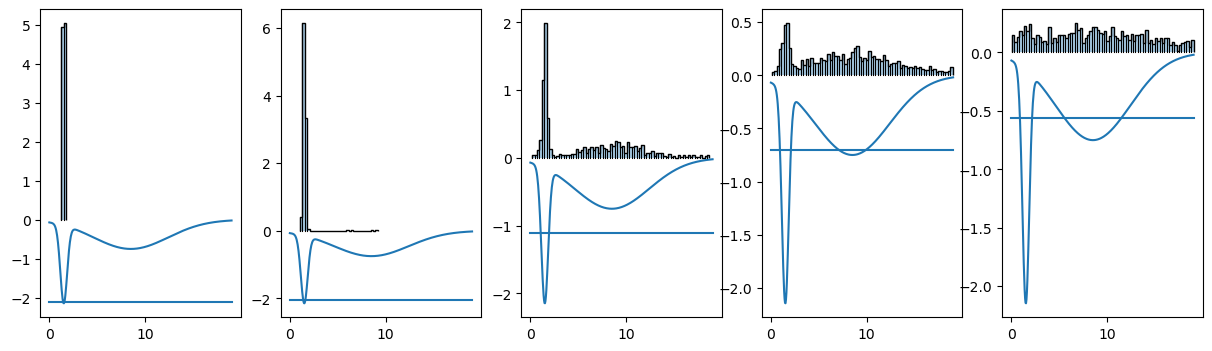

In [10]:
fig, axs= plt.subplots(1, 5, figsize=(15,4))
for ax, pot in zip(axs, pots):
    p_handler = P_dist_handler(x_min=-1.0, x_max=10.0, N=1000, proposal_func=proposal_func)
    pot.clear_p_handler(p_handler)
    print(pot.get_v_avg)
    pot.plot(ax, plot_range=[0.0, 19.0], bin_size=0.25)